### Average Weighted M Calculations and Average M Calculations and Visualizations

In [ ]:
#pip install matplotlib

In [29]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
M = pd.read_csv("weighted_M.csv")
M.head()
M.describe()

,Key,Year,M-Score,MCAP,Weighted_M
count,42349.000000,42349.000000,42349.000000,4.234900e+04,42349.000000
mean,48845.104607,1998.190725,-2.325057,2.384180e+06,-0.009783
std,59179.402005,8.700372,1.298580,1.634976e+07,0.065505
min,1115.000000,1976.000000,-4.999776,1.910000e+02,-2.441269
25%,8606.000000,1992.000000,-2.922963,3.074028e+04,-0.001372
50%,16468.000000,1999.000000,-2.561983,1.269038e+05,-0.000421
75%,65015.000000,2005.000000,-2.145418,4.076660e+05,-0.000091
max,311524.000000,2013.000000,4.988902,6.024329e+08,0.247046


#### The quarterly M-Scores of the companies have a normal looking histogram. A company is likely engaging in profit manipulation if they have a score greater than -1.78. The vast majority of the observations indicate no manipulation. -1.78 is in the 83rd percentile of observations, so about 17% of the observations are within the manipulator range.

In [74]:
np.percentile(M["M-Score"], 84)

-1.7257385950655337

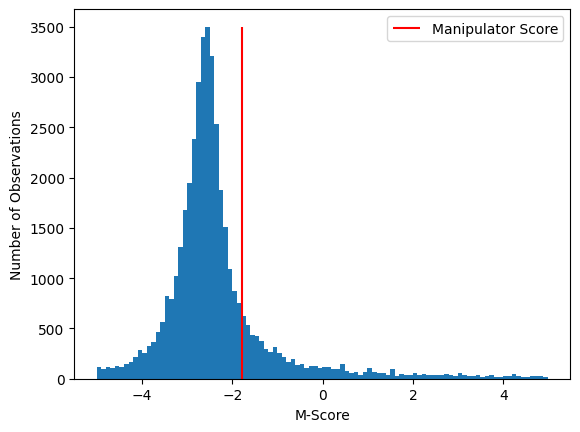

In [75]:
plt.hist(M["M-Score"], bins=100)
plt.vlines(x=-1.78, ymin=0, ymax=3500, colors="red", label="Manipulator Score")

plt.xlabel("M-Score")
plt.ylabel("Number of Observations")
plt.legend()


#### The individual weighted M-Scores tend to be very small. Not very useful to study on their own.

Text(0, 0.5, 'Number of Observations')

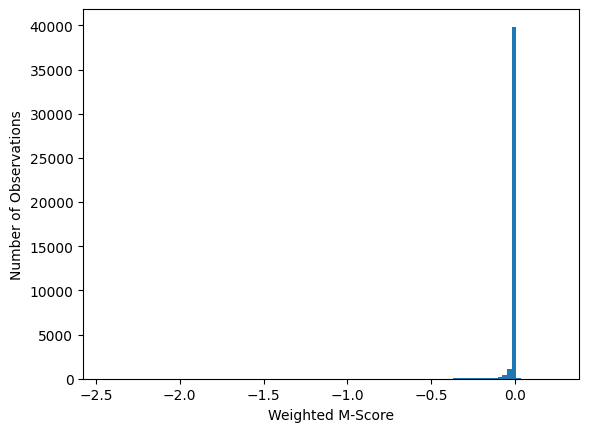

In [61]:
plt.hist(M["Weighted_M"], bins=100)
plt.xlabel("Weighted M-Score")
plt.ylabel("Number of Observations")

#### Here I computed the arithmetic mean of the the M-SCre observations and finally the weighted average for each quarter. The first two quarters observed, 1976Q4 and 1977Q1 both have less than ten observations. They may need to be excluded from further analysis, at least when M-Score is used as a predictor.

In [51]:
agg_M = M[["Quarter", "M-Score", "Weighted_M"]].groupby("Quarter").agg({"M-Score": ['mean'], "Weighted_M": ['sum']}).reset_index()
agg_M.head()

,Quarter,M-Score,Weighted_M
,,mean,sum
0,1976Q4,-3.407418,-3.203587
1,1977Q1,-2.775243,-2.296567
2,1977Q2,-2.928935,-3.587477
3,1977Q3,-2.892064,-3.602709
4,1977Q4,-2.905240,-3.580334


In [37]:
count_m = M[["Quarter", "M-Score"]].groupby("Quarter").count().reset_index()
count_m.head()                                                                       


,Quarter,M-Score
0,1976Q4,3
1,1977Q1,7
2,1977Q2,54
3,1977Q3,58
4,1977Q4,58


In [52]:
agg_M["Count"] = count_m["M-Score"]
agg_M.head(10)

,Quarter,M-Score,Weighted_M,Count
,,mean,sum,
0,1976Q4,-3.407418,-3.203587,3
1,1977Q1,-2.775243,-2.296567,7
2,1977Q2,-2.928935,-3.587477,54
3,1977Q3,-2.892064,-3.602709,58
4,1977Q4,-2.905240,-3.580334,58
5,1978Q1,-2.762485,-3.393768,58
6,1978Q2,-2.857087,-3.376276,58
7,1978Q3,-2.841396,-3.284902,58
8,1978Q4,-2.889048,-3.366239,58


In [44]:
agg_M.describe()

,M-Score,Weighted_M,Count
,count,sum,
count,147.000000,147.000000,147.000000
mean,288.088435,-2.818427,288.088435
std,123.783114,0.228430,123.783114
min,3.000000,-3.602709,3.000000
25%,212.500000,-2.904697,212.500000
50%,317.000000,-2.783834,317.000000
75%,381.000000,-2.682008,381.000000
max,492.000000,-2.135362,492.000000


([<matplotlib.axis.XTick at 0x2319cfd6f20>,
 [Text(0, 0, '1976Q4'),
  Text(4, 0, '1977Q4'),
  Text(8, 0, '1978Q4'),
  Text(12, 0, '1979Q4'),
  Text(16, 0, '1980Q4'),
  Text(20, 0, '1981Q4'),
  Text(24, 0, '1982Q4'),
  Text(28, 0, '1983Q4'),
  Text(32, 0, '1984Q4'),
  Text(36, 0, '1985Q4'),
  Text(40, 0, '1986Q4'),
  Text(44, 0, '1987Q4'),
  Text(48, 0, '1988Q4'),
  Text(52, 0, '1989Q4'),
  Text(56, 0, '1990Q4'),
  Text(60, 0, '1991Q4'),
  Text(64, 0, '1992Q4'),
  Text(68, 0, '1993Q4'),
  Text(72, 0, '1994Q4'),
  Text(76, 0, '1995Q4'),
  Text(80, 0, '1996Q4'),
  Text(84, 0, '1997Q4'),
  Text(88, 0, '1998Q4'),
  Text(92, 0, '1999Q4'),
  Text(96, 0, '2000Q4'),
  Text(100, 0, '2001Q4'),
  Text(104, 0, '2002Q4'),
  Text(108, 0, '2003Q4'),
  Text(112, 0, '2004Q4'),
  Text(116, 0, '2005Q4'),
  Text(120, 0, '2006Q4'),
  Text(124, 0, '2007Q4'),
  Text(128, 0, '2008Q4'),
  Text(132, 0, '2009Q4'),
  Text(136, 0, '2010Q4'),
  Text(140, 0, '2011Q4'),
  Text(144, 0, '2012Q4')])

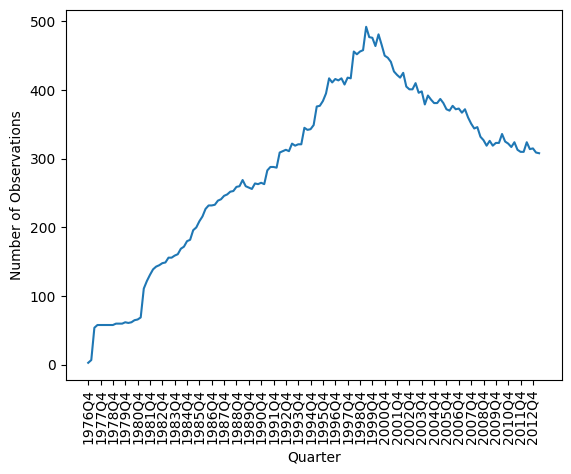

In [50]:
plt.plot(agg_M.Quarter,agg_M.Count)
plt.ylabel("Number of Observations")
plt.xlabel("Quarter")
#plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(agg_M)+1, 4), rotation=90)

#### 

In [21]:
#want to be able to plot bands of recessions
recession_start = ["1980-01-01", "1981-07-01", "1990-07-01", "2001-03-01", "2007-12-01"]
recession_end = ["1980-07-01", "1982-11-01", "1991-03-01", "2001-11-01", "2009-06-01"]

In [22]:
recession = pd.DataFrame(columns=["Start", "End"])
recession.Start = pd.PeriodIndex(recession_start, freq="Q").astype(str)
recession.End = pd.PeriodIndex(recession_end, freq="Q").astype(str)
recession.head()


,Start,End
0,1980Q1,1980Q3
1,1981Q3,1982Q4
2,1990Q3,1991Q1
3,2001Q1,2001Q4
4,2007Q4,2009Q2


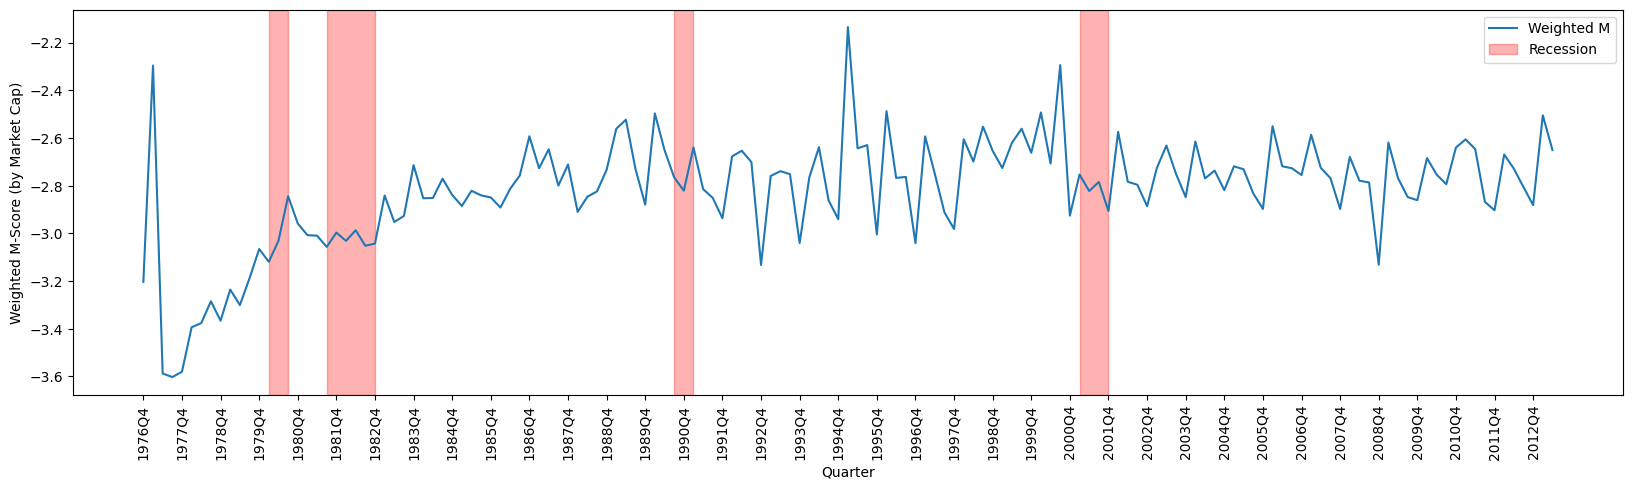

In [31]:
plt.figure(figsize=(20,5))
plt.plot(agg_M["Quarter"], agg_M["Weighted_M"], label="Weighted M")

plt.ylabel("Weighted M-Score (by Market Cap)")
plt.xlabel("Quarter")
#plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(agg_M)+1, 4), rotation=90)

plt.axvspan(recession.iloc[0,0], recession.iloc[0,1], alpha=0.3, color='red', label="Recession")
for i in range(1,len(recession)-1):
    plt.axvspan(recession.iloc[i,0], recession.iloc[i,1], alpha=0.3, color='red')

plt.legend()

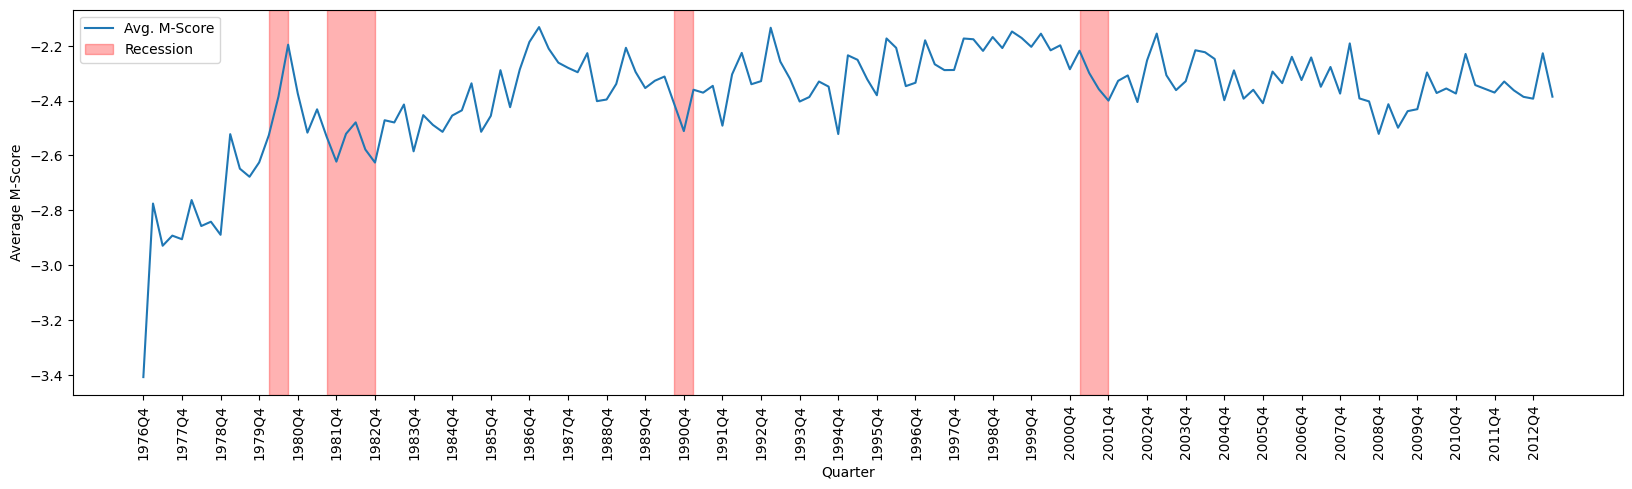

In [33]:
plt.figure(figsize=(20,5))
plt.plot(agg_M["Quarter"], agg_M["M-Score"], label="Avg. M-Score")

plt.ylabel("Average M-Score")
plt.xlabel("Quarter")
#plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(agg_M)+1, 4), rotation=90)

plt.axvspan(recession.iloc[0,0], recession.iloc[0,1], alpha=0.3, color='red', label="Recession")
for i in range(1,len(recession)-1):
    plt.axvspan(recession.iloc[i,0], recession.iloc[i,1], alpha=0.3, color='red')

plt.legend()

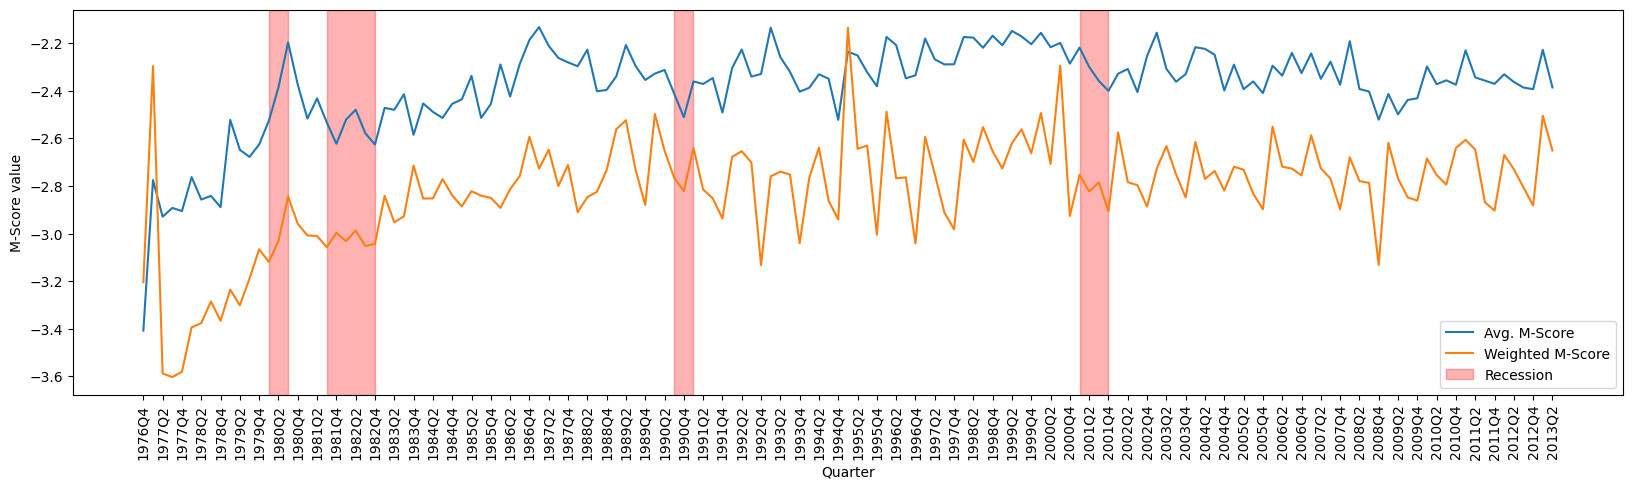

In [54]:
plt.figure(figsize=(20,5))
plt.plot(agg_M["Quarter"], agg_M["M-Score"], label="Avg. M-Score")
plt.plot(agg_M["Quarter"], agg_M["Weighted_M"], label="Weighted M-Score")

plt.ylabel("M-Score value")
plt.xlabel("Quarter")
#plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(agg_M)+1, 2), rotation=90)

plt.axvspan(recession.iloc[0,0], recession.iloc[0,1], alpha=0.3, color='red', label="Recession")
for i in range(1,len(recession)-1):
    plt.axvspan(recession.iloc[i,0], recession.iloc[i,1], alpha=0.3, color='red')

plt.legend()

In [78]:
final_M = agg_M.rename(columns={"M-Score":"Avg. M-Score"})
final_M.head()

,Quarter,Avg. M-Score,Weighted_M,Count
,,mean,sum,
0,1976Q4,-3.407418,-3.203587,3
1,1977Q1,-2.775243,-2.296567,7
2,1977Q2,-2.928935,-3.587477,54
3,1977Q3,-2.892064,-3.602709,58
4,1977Q4,-2.905240,-3.580334,58


#### Things to note with this last data frame. There are three columns of value: the arithmetic avg of M-SCore, the weighted average, and the number of observations. Weighted M-Score tends to be lower than the average. The first two quarters have less than 10 observations so they may be obsolete. 

In [79]:
final_M.to_csv('final_M.csv', encoding='utf-8', index=False,header=True)